In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
dictionary_file_location = "words_250000_train.txt"

def build_dictionary(dictionary_file_location):
    text_file = open(dictionary_file_location,"r")
    full_dictionary = text_file.read().splitlines()
    text_file.close()
    return full_dictionary

data=word_dic=build_dictionary(dictionary_file_location)

In [277]:
df=pd.DataFrame(data,columns=['Word'])
df['Word Length']=df['Word'].apply(lambda word : len(word))
df.sort_values(by='Word Length',inplace=True)
df

,Word,Word Length
135625,p,1
26735,c,1
88734,i,1
216267,v,1
157161,r,1
...,...,...
114330,microspectrophotometrically,27
87662,hydroxydesoxycorticosterone,27
80310,halfembracinghalfembracingly,28
45222,cyclotrimethylenetrinitramine,29


In [278]:
len(df['Word'].values) == df['Word'].nunique()

True

# Frequency Of Letters

<AxesSubplot:xlabel='Letter', ylabel='Value'>

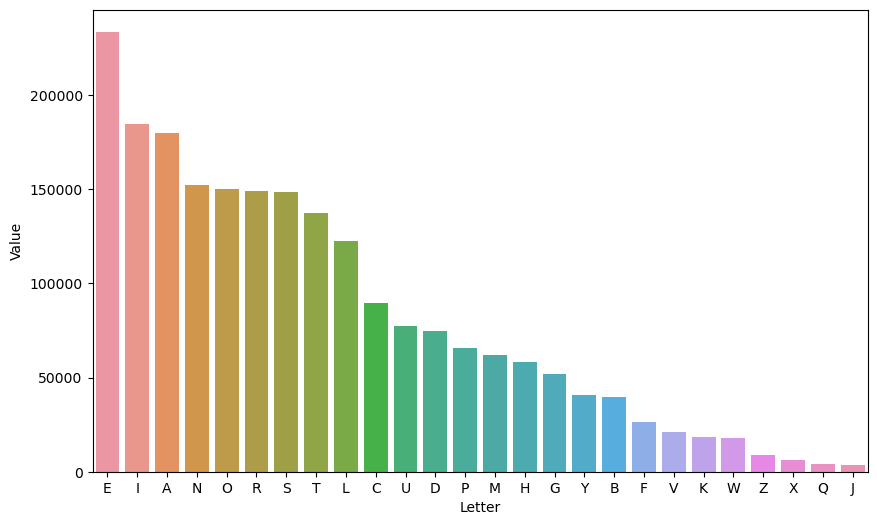

In [279]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
def get_letter_count(data):
    letterCount = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0,
                   'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0,
                   'Y': 0, 'Z': 0}
    for word in data:
        for letter in word.upper():
            if letter in LETTERS:
                letterCount[letter] += 1
    return letterCount

lf = pd.DataFrame(list(get_letter_count(data).items()),columns=['Letter','Value'])
sorted_lf=lf.sort_values(by='Value',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Letter', y = 'Value', data=sorted_lf)

# Length of Words

<AxesSubplot:xlabel='Word Length', ylabel='Word Count'>

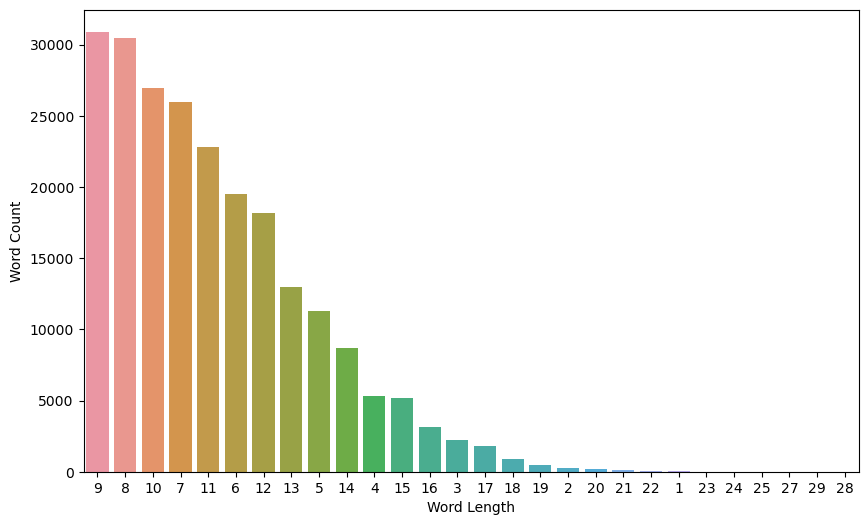

In [280]:
unique_lengths = df['Word Length'].unique()
word_counts = [len(df[df['Word Length'] == length]['Word'].values) for length in unique_lengths]
wc=pd.DataFrame(data=[unique_lengths,word_counts], index=['Word Length', 'Word Count']).T
sorted_wc = wc.groupby('Word Length').sum().reset_index().sort_values('Word Count',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Word Length', y='Word Count', data = wc, order = sorted_wc['Word Length'])

# Popularity of letter for different word lengths

In [281]:
def letter_popularity(df,word_len):
    
    letter_counts = {}

    for index, row in df.iterrows():
        word = row['Word']
        length = row['Word Length']

        letter_count = {}
        for letter in word.upper():
            letter_count[letter] = letter_count.get(letter, 0) + 1

        if length in letter_counts:
            for letter, count in letter_count.items():
                letter_counts[length][letter] = letter_counts[length].get(letter, 0) + count
        else:
            letter_counts[length] = letter_count

    sorted_letter_counts = {k: letter_counts[k] for k in sorted(letter_counts)}
    supersorted_letter_counts = {key: dict(sorted(inner_dict.items(), key=lambda item: item[1], reverse = True)) for key, inner_dict
                                 in sorted_letter_counts.items()}

    return list(supersorted_letter_counts[word_len])

####  Now using this letter popularity function we can get the order of letters to call out given the length of words. Suppose that our first guess called out from this popularity order fails, then we can filter all the words without that letter and create a similar popularity list.

In [282]:
def filtered_letter_popularity(df,word_len):
    
    letter_to_exclude = letter_popularity(df,word_len)[0]

    filtered_words = [word for word in df['Word'] if letter_to_exclude.lower() not in word]
    new_data = {'Word': filtered_words}
    new_df = pd.DataFrame(new_data)
    new_df['Word Length'] = new_df['Word'].apply(lambda word : len(word))
    return letter_popularity(new_df,word_len)

In [283]:
letter_popularity(df,12)

['E',
 'I',
 'A',
 'N',
 'O',
 'R',
 'T',
 'S',
 'L',
 'C',
 'U',
 'D',
 'P',
 'M',
 'H',
 'G',
 'Y',
 'B',
 'F',
 'V',
 'W',
 'K',
 'Z',
 'X',
 'Q',
 'J']

In [284]:
filtered_letter_popularity(df,12)

['I',
 'O',
 'A',
 'N',
 'T',
 'S',
 'L',
 'R',
 'C',
 'U',
 'P',
 'H',
 'G',
 'M',
 'Y',
 'D',
 'B',
 'F',
 'V',
 'K',
 'W',
 'Z',
 'Q',
 'X',
 'J']